In [ ]:
import numpy as np
import glob
from PIL import Image

categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
nb_classes = len(categories)
image_w = 299
image_h = 299

caltech_dir1 = "D:/OCT-Image/make_dataset/test"
x = []
y = []
print('Start test')

for idx, cat in enumerate(categories):  # 라벨링작업
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = caltech_dir1 + "/"
    files = glob.glob(image_dir + cat + "/*")  # 경로에 대응되는 모든파일
    for i, f in enumerate(files):
        print(f)
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
       # data = data.reshape((image_w, image_h, 1))
        label = np.asarray(label)
        x.append(data)
        y.append(label)
X = np.array(x)
y = np.array(y)
np.save("testx280.npy", X)
np.save("testy280.npy", y)
print("ok test", len(y))

## 모델

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np 
import time

X_train = np.load('trainx280.npy')
X_test = np.load('testx280.npy')
y_train = np.load('trainy280.npy')
y_test = np.load('testy280.npy')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# model 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
print(model.summary())

# model 학습과정설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


print("start train")
start = time.time() # 현재시간 측정
history = model.fit(x=X_train, y=y_train,validation_data=(X_test,y_test), batch_size=128, epochs=100)
print("time :", (time.time() - start) / 60) # 학습하는데 걸리는 시간(현재시간 - 아까 측정한 시간)
model.save('Model_3.h5') # 모델 저장시키기

Using TensorFlow backend.


(82484, 299, 299, 3)
(1000, 299, 299, 3)
(82484, 4)
(1000, 4)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 64)        0         
__________________________________________________________

82484/82484 [==============================] - 179s 2ms/step - loss: 0.1242 - acc: 0.9604 - val_loss: 0.1508 - val_acc: 0.9660
Epoch 47/100
82484/82484 [==============================] - 179s 2ms/step - loss: 0.1095 - acc: 0.9654 - val_loss: 0.2083 - val_acc: 0.9550
Epoch 48/100
82484/82484 [==============================] - 178s 2ms/step - loss: 0.1132 - acc: 0.9645 - val_loss: 0.2338 - val_acc: 0.9580
Epoch 49/100
82484/82484 [==============================] - 176s 2ms/step - loss: 0.1072 - acc: 0.9665 - val_loss: 0.1555 - val_acc: 0.9630
Epoch 50/100
82484/82484 [==============================] - 176s 2ms/step - loss: 0.1018 - acc: 0.9691 - val_loss: 0.1330 - val_acc: 0.9670
Epoch 51/100
82484/82484 [==============================] - 176s 2ms/step - loss: 0.1040 - acc: 0.9684 - val_loss: 0.1783 - val_acc: 0.9660
Epoch 52/100
82484/82484 [==============================] - 176s 2ms/step - loss: 0.1006 - acc: 0.9694 - val_loss: 0.2018 - val_acc: 0.9520
Epoch 53/100
82484/82484 [=======

## Accuracy, Loss 그래프

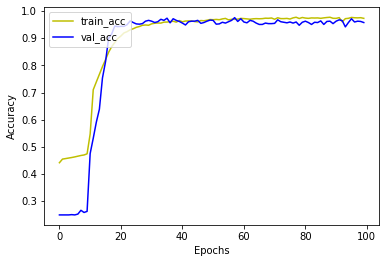

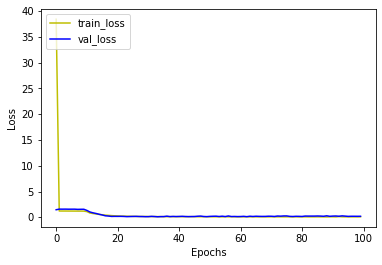

In [2]:
# acc 그래프
plt.figure("train_graph")
plt.plot(history.history['acc'], 'y', label='train_acc')
plt.plot(history.history['val_acc'], 'b', label='val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# val 그래프
plt.figure("val_graph")
plt.plot(history.history['loss'], 'y', label='train_loss')
plt.plot(history.history['val_loss'],'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

## 각 이미지에 대한 모델의 정확도 확인

In [3]:
import numpy as np
from PIL import Image
import glob
from keras.models import load_model
model = load_model('Model_2.h5')

test_path = "D:/OCT-Image/make_dataset/val/"
categories = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

image_w = 299
image_h = 299

for idx, categorie in enumerate(categories):
    result_list = []
    files = glob.glob(test_path + categorie + "/*")
    
    for idx2, file in enumerate(files):
        img = Image.open(file)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        data = data.reshape((1,image_w,image_h,3))
        result = model.predict_classes(data)
        
        if categorie == 'CNV'and result[0] == 0:
            result_list.append(1)
        elif categorie == 'DME' and result[0] == 1:
            result_list.append(1)
        elif categorie == 'DRUSEN' and result[0] == 2:
            result_list.append(1)
        elif categorie == 'NORMAL' and result[0] == 3:
            result_list.append(1)
        else:
            result_list.append(0)
    print(categorie + " 결과 리스트") 
    print(result_list)
    print(categorie + "의 test정확도 : " + str(np.mean(result_list)))

CNV 결과 리스트
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
CNV의 test정확도 : 0.948
DME 결과 리스트
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0